<a href="https://colab.research.google.com/github/rezamohamadlo/Shakespeare-Text-Generator/blob/main/Shakespeare_Text_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For plotting graphs and visualizations

# Importing necessary modules from TensorFlow/Keras for building neural network models
from tensorflow.keras.models import Sequential  # Sequential model to stack layers linearly
from tensorflow.keras.utils import to_categorical  # For one-hot encoding labels for classification tasks

# Importing tokenization and sequence padding utilities for text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizer to convert text to sequences of integers
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to ensure uniform input size

# Importing different layers for building the model
from tensorflow.keras.layers import Embedding  # Embedding layer to convert integer tokens to dense vectors of fixed size
from tensorflow.keras.layers import LSTM  # LSTM layer (Long Short-Term Memory) for handling sequential data
from tensorflow.keras.layers import Dense  # Dense (fully connected) layer for output or intermediate processing
from tensorflow.keras.layers import Bidirectional  # Bidirectional wrapper for LSTM, processes inputs in both directions

In [2]:
# Downloading the 'sonnets.txt' file using gdown (Google Drive downloader)
# The specific file is identified by its unique ID: 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
# Make sure you have gdown installed in your environment: !pip install gdown
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 64.0MB/s]


In [3]:
# Define the path to the file containing the sonnets
SONNETS_FILE = '/content/sonnets.txt'

# Open the file in read mode and load its content into the variable 'data'
with open('./sonnets.txt') as f:
    data = f.read()

# Convert all the text to lowercase and split it into individual lines using the newline character ('\n')
# The result is a list where each element corresponds to a line from the sonnets
corpus = data.lower().split("\n")

# Print the number of lines in the corpus
print(f"There are {len(corpus)} lines of sonnets\n")

# Print the first 5 lines from the corpus to get a sense of what the data looks like
print(f"The first 5 lines look like this:\n")
for i in range(5):
    print(corpus[i])


There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,


In [4]:
# Initialize the Tokenizer, which will be used to convert text to sequences of integers
tokenizer = Tokenizer()

# Fit the tokenizer on the corpus, which will create a dictionary mapping words to unique integer indices
tokenizer.fit_on_texts(corpus)

# Get the total number of unique words in the corpus by accessing the word index and adding 1
# (the extra 1 is for padding or the reserved index for unknown tokens)
total_words = len(tokenizer.word_index) + 1


In [5]:
corpus[0]


'from fairest creatures we desire increase,'

In [6]:
# Convert the first line of the corpus (corpus[0]) into a sequence of integers
# Each word is replaced by its corresponding index from the tokenizer's word index
tokenizer.texts_to_sequences([corpus[0]])


[[34, 417, 877, 166, 213, 517]]

In [7]:
# Convert the first line of the corpus (corpus[0]) into a sequence of integers
# Access the first (and only) list from the result, which contains the tokenized integers
tokenizer.texts_to_sequences([corpus[0]])[0]


[34, 417, 877, 166, 213, 517]

In [8]:
# Function to create n-gram sequences from the corpus
def n_gram_seqs(corpus, tokenizer):
    # Initialize an empty list to hold the input sequences
    input_sequences = []

    # Loop through each line in the corpus
    for line in corpus:
        # Convert the current line into a list of integer tokens
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Loop through the token list to create n-gram sequences
        # For each token list, take increasing slices of the sequence (from the first token to i+1 tokens)
        for i in range(1, len(token_list)):
            # Slice the token list to create an n-gram sequence
            n_gram_sequence = token_list[:i+1]
            # Append the n-gram sequence to the list of input sequences
            input_sequences.append(n_gram_sequence)

    # Return the list of all n-gram sequences generated from the corpus
    return input_sequences


In [9]:
# Test the n_gram_seqs function with the first line of the corpus
# Call the function with a list containing only the first line and the tokenizer
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

# Print the resulting n-gram sequences for the first example
print("n_gram sequences for first example look like this:\n")
print(first_example_sequence)


n_gram sequences for first example look like this:

[[34, 417], [34, 417, 877], [34, 417, 877, 166], [34, 417, 877, 166, 213], [34, 417, 877, 166, 213, 517]]


In [10]:
# Test the n_gram_seqs function with a larger subset of the corpus
# Call the function with a list containing lines 1 to 3 of the corpus and the tokenizer
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

# Print the resulting n-gram sequences for the selected subset of the corpus
print("n_gram sequences for next 3 examples look like this:\n")
print(next_3_examples_sequence)


n_gram sequences for next 3 examples look like this:

[[8, 878], [8, 878, 134], [8, 878, 134, 351], [8, 878, 134, 351, 102], [8, 878, 134, 351, 102, 156], [8, 878, 134, 351, 102, 156, 199], [16, 22], [16, 22, 2], [16, 22, 2, 879], [16, 22, 2, 879, 61], [16, 22, 2, 879, 61, 30], [16, 22, 2, 879, 61, 30, 48], [16, 22, 2, 879, 61, 30, 48, 634], [25, 311], [25, 311, 635], [25, 311, 635, 102], [25, 311, 635, 102, 200], [25, 311, 635, 102, 200, 25], [25, 311, 635, 102, 200, 25, 278]]


In [11]:
# Apply the n_gram_seqs function to the entire corpus to generate n-gram sequences
input_sequences = n_gram_seqs(corpus, tokenizer)

# Compute the maximum length of the sequences in input_sequences
# Find the length of each sequence and get the maximum value
max_sequence_len = max([len(x) for x in input_sequences])

# Print the number of n-gram sequences generated
print(f"n_grams of input_sequences have length: {len(input_sequences)}")

# Print the maximum length of the sequences
print(f"maximum length of sequences is: {max_sequence_len}")


n_grams of input_sequences have length: 15462
maximum length of sequences is: 11


In [12]:
# Function to pad sequences to a specified maximum length
def pad_seqs(input_sequences, maxlen):
    # Use the pad_sequences function to pad sequences to the specified length
    # Padding is done at the beginning of the sequences ('pre' padding)
    padded_sequences = pad_sequences(input_sequences, maxlen=maxlen, padding='pre')

    # Return the padded sequences
    return padded_sequences


In [13]:
# Pad the n-gram sequences for the first example to the length of the number of sequences
# This ensures all sequences have the same length
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))

# Display the padded sequences for the first example
first_padded_seq


array([[  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213],
       [417, 877, 166, 213, 517]], dtype=int32)

In [14]:
# Pad the n-gram sequences for the next 3 examples to the maximum length of those sequences
# Compute the maximum length of sequences in next_3_examples_sequence
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))

# Display the padded sequences for the next 3 examples
next_3_padded_seq


array([[  0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   8, 878, 134, 351, 102, 156],
       [  0,   8, 878, 134, 351, 102, 156, 199],
       [  0,   0,   0,   0,   0,   0,  16,  22],
       [  0,   0,   0,   0,   0,  16,  22,   2],
       [  0,   0,   0,   0,  16,  22,   2, 879],
       [  0,   0,   0,  16,  22,   2, 879,  61],
       [  0,   0,  16,  22,   2, 879,  61,  30],
       [  0,  16,  22,   2, 879,  61,  30,  48],
       [ 16,  22,   2, 879,  61,  30,  48, 634],
       [  0,   0,   0,   0,   0,   0,  25, 311],
       [  0,   0,   0,   0,   0,  25, 311, 635],
       [  0,   0,   0,   0,  25, 311, 635, 102],
       [  0,   0,   0,  25, 311, 635, 102, 200],
       [  0,   0,  25, 311, 635, 102, 200,  25],
       [  0,  25, 311, 635, 102, 200,  25, 278]], dtype=int32)

In [15]:
# Pad all sequences in the corpus to the maximum sequence length
# Use max_sequence_len as the padding length to ensure uniform sequence length across the entire corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

# Print the shape of the padded corpus to verify dimensions
print(f"padded corpus has shape: {input_sequences.shape}")


padded corpus has shape: (15462, 11)


In [16]:
# Function to split sequences into features and labels, and convert labels to one-hot encoding
def features_and_labels(input_sequences, total_words):
    # Extract features from the input_sequences by taking all but the last token of each sequence
    features = input_sequences[:, :-1]

    # Extract labels from the input_sequences by taking the last token of each sequence
    labels = input_sequences[:, -1]

    # Convert the labels to one-hot encoded vectors
    # num_classes is set to total_words to match the size of the vocabulary
    one_hot_labels = to_categorical(labels, num_classes=total_words)

    # Return the features and one-hot encoded labels
    return features, one_hot_labels


In [17]:
# Test the features_and_labels function with the padded n-gram sequences of the first example
# Extract features and one-hot encoded labels from the padded sequences
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

# Print the shape of the one-hot encoded labels to verify dimensions
print(f"labels have shape: {first_labels.shape}")

# Print the features to check their content
print("\nfeatures look like this:\n")
first_features


labels have shape: (5, 3211)

features look like this:



array([[  0,   0,   0,  34],
       [  0,   0,  34, 417],
       [  0,  34, 417, 877],
       [ 34, 417, 877, 166],
       [417, 877, 166, 213]], dtype=int32)

In [18]:
# Apply the features_and_labels function to the entire padded corpus
# Extract features and one-hot encoded labels from the padded sequences
features, labels = features_and_labels(input_sequences, total_words)

# Print the shape of the features to verify dimensions
print(f"features have shape: {features.shape}")

# Print the shape of the one-hot encoded labels to verify dimensions
print(f"labels have shape: {labels.shape}")


features have shape: (15462, 10)
labels have shape: (15462, 3211)


In [19]:
# Function to create and compile a neural network model for text prediction
def create_model(total_words, max_sequence_len):
    # Initialize a Sequential model
    model = Sequential()

    # Add an Embedding layer to convert word indices to dense vectors
    # total_words is the size of the vocabulary
    # 100 is the dimension of the dense vector for each word
    # input_length is the length of the input sequences (max_sequence_len - 1 for features)
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

    # Add a Bidirectional LSTM layer to capture patterns in both forward and backward directions
    # 150 is the number of units in the LSTM layer
    model.add(Bidirectional(LSTM(150)))

    # Add a Dense layer with softmax activation to output a probability distribution over the vocabulary
    # total_words is the number of output units, one for each word in the vocabulary
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model with categorical crossentropy loss and Adam optimizer
    # Metrics to track during training is accuracy
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Return the compiled model
    return model


In [20]:
# Create an untrained model using the create_model function
# total_words is the size of the vocabulary, max_sequence_len is the length of input sequences
model = create_model(total_words, max_sequence_len)

# Train the model with the training data
# features are the input sequences, labels are the one-hot encoded target labels
# epochs specifies the number of times to iterate over the training data
# verbose=1 provides detailed logging of the training process
history = model.fit(features, labels, epochs=50, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0215 - loss: 7.0669
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0302 - loss: 6.4101
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0397 - loss: 6.1881
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0531 - loss: 5.8953
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0590 - loss: 5.6050
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0790 - loss: 5.2389
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0931 - loss: 4.8910
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1357 - loss: 4.4860
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1836 - loss: 4.0999
Epoch 10/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2452 - loss: 3.7416
Epoch 11/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3080 - loss: 3.4061
Epoch 12/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/ste

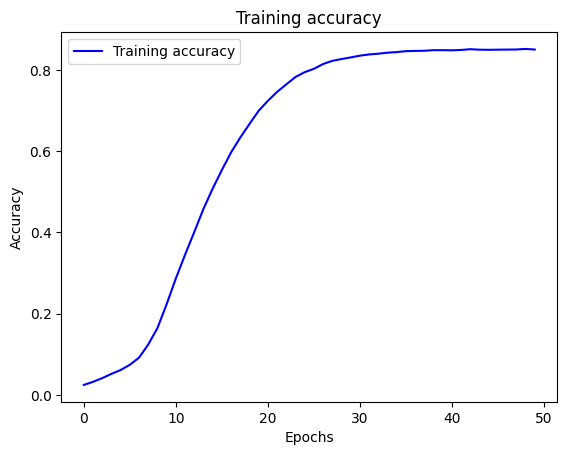

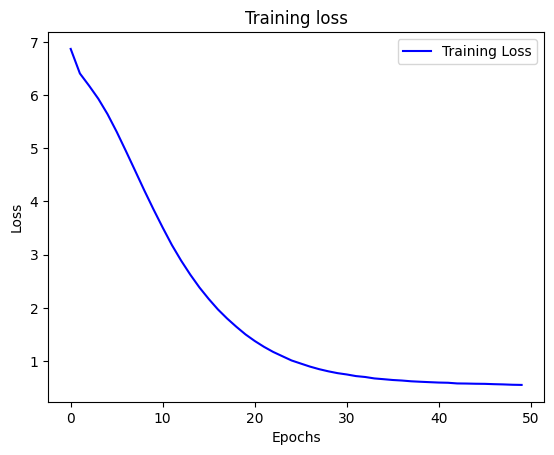

In [21]:
# Retrieve the training accuracy and loss from the training history
acc = history.history['accuracy']
loss = history.history['loss']

# Create a range of epoch numbers for plotting
epochs = range(len(acc))

# Plot the training accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a new figure for the loss plot
plt.figure()

# Plot the training loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.show()


In [22]:
def download_history():
    import pickle
    from google.colab import files

    # Save the training history to a pickle file
    # 'history.history' contains the training metrics (accuracy, loss) from the model
    with open('history.pkl', 'wb') as f:
        pickle.dump(history.history, f)

    # Download the pickle file to the local machine
    files.download('history.pkl')

# Call the function to execute the download
download_history()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Define the seed text and the number of words to generate
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

# Generate the next_words based on the seed text
for _ in range(next_words):
    # Convert the seed text into a sequence of integers
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequence to the required input length for the model
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Predict the probabilities of the next word
    predicted = model.predict(token_list, verbose=0)
    # Choose the word with the highest probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the tokenizer's word index
    output_word = tokenizer.index_word[predicted]
    # Append the predicted word to the seed text
    seed_text += " " + output_word

# Print the generated text
print(seed_text)


Help me Obi Wan Kenobi, you're my only hope and far distill'd kind of enough 'fore ' taught to thence ' thence doth stand thence i grew thee 'will' to dote it return long rare away to me thence divide ' accents cannot be or me those more can see thee life's comes they not thence thy head ' ' doth catch my way ' ' ' prove you have faculty from thee bring well of thee more bad more true more bright of sepulchres falsehood are bail corrupting mother's 'will' cold nurse divide impression swear against sunset thence from thee bring done not thence it return yourself than
